<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#7.-합성곱신경망(Convolutional-Neural-Network)" data-toc-modified-id="7.-합성곱신경망(Convolutional-Neural-Network)-1">7. 합성곱신경망(Convolutional Neural Network)</a></span><ul class="toc-item"><li><span><a href="#7.1-전체-구조" data-toc-modified-id="7.1-전체-구조-1.1">7.1 전체 구조</a></span></li><li><span><a href="#7.2-합성곱-계층" data-toc-modified-id="7.2-합성곱-계층-1.2">7.2 합성곱 계층</a></span><ul class="toc-item"><li><span><a href="#[완전연결-계층의-문제점]" data-toc-modified-id="[완전연결-계층의-문제점]-1.2.1">[완전연결 계층의 문제점]</a></span></li><li><span><a href="#[합성곱-연산]" data-toc-modified-id="[합성곱-연산]-1.2.2">[합성곱 연산]</a></span></li><li><span><a href="#[패팅]" data-toc-modified-id="[패팅]-1.2.3">[패팅]</a></span></li><li><span><a href="#[스트라이드]" data-toc-modified-id="[스트라이드]-1.2.4">[스트라이드]</a></span><ul class="toc-item"><li><span><a href="#&lt;&lt;출력-크기-계산-공식&gt;&gt;" data-toc-modified-id="<<출력-크기-계산-공식>>-1.2.4.1">&lt;&lt;출력 크기 계산 공식&gt;&gt;</a></span></li></ul></li><li><span><a href="#[3차원-데이터의-합성곱-연산]" data-toc-modified-id="[3차원-데이터의-합성곱-연산]-1.2.5">[3차원 데이터의 합성곱 연산]</a></span></li><li><span><a href="#[블록으로-생각하기]" data-toc-modified-id="[블록으로-생각하기]-1.2.6">[블록으로 생각하기]</a></span></li><li><span><a href="#[배치-처리]" data-toc-modified-id="[배치-처리]-1.2.7">[배치 처리]</a></span></li></ul></li><li><span><a href="#7.3-풀링-계층" data-toc-modified-id="7.3-풀링-계층-1.3">7.3 풀링 계층</a></span><ul class="toc-item"><li><span><a href="#[풀링-계층의-특징]" data-toc-modified-id="[풀링-계층의-특징]-1.3.1">[풀링 계층의 특징]</a></span><ul class="toc-item"><li><span><a href="#학습해야-할-매개변수가-없다." data-toc-modified-id="학습해야-할-매개변수가-없다.-1.3.1.1">학습해야 할 매개변수가 없다.</a></span></li><li><span><a href="#채널-수가-변하지-않는다." data-toc-modified-id="채널-수가-변하지-않는다.-1.3.1.2">채널 수가 변하지 않는다.</a></span></li><li><span><a href="#입력의-변화에-영향을-적게-받는다.(강건하다.)" data-toc-modified-id="입력의-변화에-영향을-적게-받는다.(강건하다.)-1.3.1.3">입력의 변화에 영향을 적게 받는다.(강건하다.)</a></span></li></ul></li></ul></li><li><span><a href="#7.4-합성곱/풀링-계층-구현하기" data-toc-modified-id="7.4-합성곱/풀링-계층-구현하기-1.4">7.4 합성곱/풀링 계층 구현하기</a></span><ul class="toc-item"><li><span><a href="#[4차원-배열]" data-toc-modified-id="[4차원-배열]-1.4.1">[4차원 배열]</a></span></li><li><span><a href="#[im2col로-데이터-전개하기]" data-toc-modified-id="[im2col로-데이터-전개하기]-1.4.2">[im2col로 데이터 전개하기]</a></span></li><li><span><a href="#[합성곱-계층-구현하기]" data-toc-modified-id="[합성곱-계층-구현하기]-1.4.3">[합성곱 계층 구현하기]</a></span></li><li><span><a href="#[풀링-계층-구현하기]" data-toc-modified-id="[풀링-계층-구현하기]-1.4.4">[풀링 계층 구현하기]</a></span></li></ul></li><li><span><a href="#7.5-CNN-구현하기" data-toc-modified-id="7.5-CNN-구현하기-1.5">7.5 CNN 구현하기</a></span></li><li><span><a href="#7.6-CNN-시각화하기" data-toc-modified-id="7.6-CNN-시각화하기-1.6">7.6 CNN 시각화하기</a></span></li></ul></li></ul></div>

# 7. 합성곱신경망(Convolutional Neural Network)

## 7.1 전체 구조

- 지금까지 본 신경망은 인접하는 계층의 모든 뉴런과 결합되어 있었으며, 이를 **완전연결(Fully Connected, 전결합) 신경망** 이라 하고, <br>
   완전히 연결된 계층을 Affine 계층이라는 이름으로 구현했음
- CNN에서는 합성곱 계층과 풀링 계층이 추가되며, CNN 계층은 **"Convolution - ReLU - Pooling"** 흐름으로 연결되며, <br>
   **Affine 계층이 Convolution 계층으로 바뀐 것**으로 생각할 수 있음
- 출력에 가까운 층에서는 지금까지의 "Affine - ReLU" 구성을 사용할 수 있으며, 마지막 출력 계층에서는 "Affine - Softmax" 조합을 그대로 사용함

## 7.2 합성곱 계층

- **CNN에서는 각 계층 사이에 3차원 데이터 같이 입체적인 데이터가 흐른다는 점에서 완전연결 신경망과 다름**

### [완전연결 계층의 문제점]

- **완전연결 계층은 데이터의 형상이 무시됨**
    - 이미지 데이터의 경우 세로, 가로, 채널(색상)로 구성된 3차원 데이터 이지만, <br>
       **완전연결 계층에 입력할 때는 3차원 데이터를 평평한 1차원 데이터로 바꿔줘야 함**
    - 이미지는 3차원 형상이며, 이 형상에는 소중한 공간적 정보가 담겨 있으며, <br>
      공간적으로 가까운 픽셀은 값이 비슷하거나, RGB의 각 채널은 서로 밀접하게 관련되어 있거나, <br>
      거리가 먼 픽셀끼리는 별 연관이 없는 등, 3차원 속에서 의미를 갖는 본질적인 패턴이 숨어 있음
    - **완전 연결 계층은 형상을 무시하고 모든 입력 데이터를 동등한 뉴런(같은 차원의 뉴런)으로 취급하여 형상에 담긴 정보를 살릴 수 없음**
- **합성곱 계층은 형상을 유지함. 이미지를 3차원 데이터로 입력 받으며, 다음 계층에도 3차원 데이터로 전달함**
- CNN에서는 합성곱 계층의 입출력 데이터를 **특징 맵(Feature Map)** 이라고도 함. 입력 데이터를 **입력 특징 맵**, 출력 데이터를 **출력 특징 맵** 이라고 함

### [합성곱 연산]

- 합성곱 계층에서는 **합성곱 연산**을 처리하며, 합성곱 연산은 이미지 처리에서 말하는 **필터 연산**에 해당함
- 합성곱 연산을 $\large \circledast$ 기호로 표시하며, 합성곱 연산으로 입력 데이터에 필터를 적용함
- 데이터와 필터의 형상을 **(높이$^{height}$, 너비$^{width}$)** 로 표기함
- 문헌에 따라 필터를 커널이라 칭하기도 함
- 합성곱 연산은 필터의 윈도우(Window)를 일정 간격으로 이동해가며 입력 데이터에 적용함
- **입력과 필터에서 대응하는 원소끼리 곱한 후 그 총합을 구함**. 이 계산을 **단일 곱셈-누산(Fused Multiply-Add, FMA)** 이라 함
- **CNN에서는 필터의 매개변수가 가중치에 해당**
- 편향은 필터를 적용한 후에 데이터에 더해짐. **편향은 항상 하나(1 X 1) 만 존재하며, 그 하나의 고정 값을 필터를 적용한 모든 원소에 더함**
- **합성곱 연산(필터와 편향)**
> ![합성곱 연산](./images/07001.jpg)

### [패팅]

- **합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정 값(0 등)으로 채우는 것을 패팅(Padding)이라 함**
- 폭 1짜리 패팅이라 하면, 입력 데이터의 사방 1 픽셀을 특정 값으로 채우는 것 <br>
   예로, (4, 4) 크기의 입력 데이터에 폭 1짜리 패팅을 추가하면, 크기가 (6, 6)이 됨
- **패팅은 주로 출력 크기를 조정할 목적으로 사용** <br>
   합성곱 연산을 거칠 때마다 크기가 작아지면 어느 시점에서는 출력 크기가 1이 되어 더 이상은 합성곱 연산을 적용할 수 없게 되는 문제를 방지
- 패팅을 적용하면 입력 데이터의 공간적 크기를 고정한 채로 다음 계층에 전달할 수 있음

### [스트라이드]

- **필터를 적용하는 위치(윈도우 사이)의 간격을 스트라이드(Stride)라 함**
- 스트라이드를 2로 하면, 필터를 적용하는 윈도우가 두 칸씩 이동함. 스트라이드는 필터를 적용하는 간격을 지정함
- 스트라이드를 키우면 출력 크리가 작아짐

#### <<출력 크기 계산 공식>>

- 입력 크기는 (H, W), 필터 크기는 (FH, FW), 출력크기는 (OH, OW), 패팅은 P, 스트라이드는 S라 하면,

$$\matrix{OH} = \frac{\matrix H + 2P - FH}{\matrix S} + 1 \\
    \matrix{OW} = \frac{\matrix W + 2P - FW}{\matrix S} + 1$$
    
- ($\large \frac{\matrix H + 2P - FH}{\matrix S} \small + 1$) 과 ($\large \frac{\matrix W + 2P - FW}{\matrix S} \small + 1$) 은 정수로 나누어 떨어지는 값이어야 함

### [3차원 데이터의 합성곱 연산]

- 2차원 일때와 비교하면 **3차원 데이터의 합성곱 연산은 길이 방향(채널 방향)으로 특징 맵이 늘어남**
- 채널 쪽으로 특징 맵이 여려 개 있다면, **입력 데이터와 필터의 합성곱 연산을 채널마다 수행하고, 그 결과를 더해서 하나의 출력을 만듬**
![3차원 데이터 합성곱 연산](./images/07002.jpg)

- **입력 데이터의 채널 수와 필터의 채널 수가 같아야 하며, 모든 채널의 필터가 같은 크기여야 함**

### [블록으로 생각하기]

- **3차원 데이터를 다차원 배열로 나타낼 때는 (채널$^{channel}$, 높이$^{weight}$, 너비$^{width}$) 순서로 씀**W
- 채널 수 C, 높이 H, 너비 W 인 데이터의 형상은 (C, H, W)로 쓰고, 필터 높이 FH, 필터 너비 FW인 필터의 형상은 (C, FH, FW)로 씀
- **합성곱 연산을 직육면체 블록으로 도식화**

![합성곱 연산 직육면체 블록](./images/07003.jpg)

> - **출력 데이터는 한장의 특징 맵이 됨(채널이 1개인 특징 맵)**

- **합성곱 연산의 출력으로 다수의 채널을 내보내려면 필터(가중치)를 다수 사용하면 됨**

![합성곱 연산의 다수 채널 출력](./images/07004.jpg)

> - 필터를 FN개 적용하면, 출력 맵도 FN개가 생성되며, FN개의 맵을 모으면 형상이 (FN, OH, OW) 인 블록이 완성됨
> - 합성곱 연산에서는 필터의 수도 고려해야 하며, 그런 이유로 **필터의 가중치 데이터는 4차원 데이터 이며, (출력 채널 수, 입력 채널 수, 높이, 너비) 순으로 씀**

- **편향은 채널 하나에 값 하나 씩으로 구성됨**

![합성곱 블록 연산](./images/07005.jpg)

> - 편향의 형상은 (FN, 1, 1) 이고, 필터의 출력 결과의 형상은 (FN, OH, OW) 이며, <br>
    이들 두 블록을 더하면 편향의 각 값이 필터의 출력에 대응하는 채널의 원소 모두에 더해짐 <br>
    (블록의 덧셈은 numpy의 브로드캐스트 기능으로 쉽게 구현할 수 있음)

### [배치 처리]

- **배치 처리를 위해서는 각 계층을 흐르는 데이터의 차원을 하나 늘려서 4차원 데이터로 저장함**
- 데이터를 **(데이터 수, 채널 수, 높이, 너비)** 순으로 저장함 
- **합성곱 연산의 배치 처리 흐름**

![합성곱 연산 배치 처리 흐름](./images/07006.jpg)

> - 이처럼 데이터는 4차원 형상을 가진 채 각 계층을 타고 흐름
> - 신경망에 4차원 데이터가 하나 흐를 때마다 데이터 N개에 대한 합성곱 연산이 이루어짐. 즉 N회 분의 처리를 한 번에 수행함

## 7.3 풀링 계층

- **풀링은 세로$\cdot$가로 방향의 공간을 줄이는 연산임**. 일정한 크기의 영역을 원소 하나로 집약하여 공간의 크기를 줄임
- $2 x 2$ **최대 풀링(Max Pooling)**은 $2 x 2$ 크기의 대상 영역의 원소 중 최대값을 결과로 커냄
- **폴링의 윈도우 크기와 스트라이드는 같은 값으로 설정**하는 것이 보통임 (예, $2 x 2$ 최대 풀링의 스트라이드는 $2$로 설정)

### [풀링 계층의 특징]

#### 학습해야 할 매개변수가 없다.
- 풀링 계층은 합성곱 계층과 달리 학습해야 할 매개변수가 없음 <br>
   (풀링은 대상 영역에서 최대값이나 평균 등을 취하는 명확한 처리 이므로 특별히 학습할 것이 없음)

#### 채널 수가 변하지 않는다.
- 풀링 연산은 입력 데이터의 채널 수 그대로 출력 데이터로 보냄 (**채널 마다 독립적으로 계산** 하기 때문)

#### 입력의 변화에 영향을 적게 받는다.(강건하다.)
- 입력 데이터가 조금 변해도 풀링의 결과는 잘 변하지 않음. <br>
   예로, 입력 데이터 중 일부가 오른 쪽으로 1칸식 이동해도, 풀링이 흡수해 사라지게 하는 모습을 보여줌 <br>
   (풀링 윈도 영역 안에서 값들의 위치 변화나 약간의 잡음이 추가되어도 출력에 영향이 별로 없음)

## 7.4 합성곱/풀링 계층 구현하기

### [4차원 배열]

- CNN에서 계층 사이를 흐르는 데이터는 4차원임
- 형상이 (10, 1, 28, 28)이라면, 높이 28, 너비 28, 채널 1(흑백)인 데이터가 10개라는 의미

In [1]:
import numpy as np

x = np.random.rand(10, 1, 28, 28)
print(x.shape)

(10, 1, 28, 28)


In [2]:
# 첫 번째 데이터에 접근
print(x[0].shape)

# 첫 번째 데이터의 첫 채널의 공간 데이터에 접근
print(x[0, 0].shape)      # x[0][0]와 같음

(1, 28, 28)
(28, 28)


### [im2col로 데이터 전개하기]

- **im2col 함수는 입력 데이터를 필터링(가중치 계산) 하기 졸게 전개하는(펼치는) 함수.** im2col은 image to column(이미지를 행렬로) 약자
- for 문을 사용하지 않고 행렬의 내적으로 계산할 수 있도록 데이터를 전개함

- **im2col 동작**

![im2col 동작](./images/fig7-18.png)

> - 배치 안의 데이터 수를 포함한 4차원 데이터를 2차원으로 변환 함
> - **입력 데이터에서 필터를 적용하는 영역(3차원 블록)을 한 줄로 늘어놓음**. 이 전개를 필터를 적용하는 모든 영역에서 수행함
> - 입력 데이터가 여러 개 라도 데이터를 층으로 쌓는 것이 아니라, 모든 데이터에 대해 행으로 전개 함. <br>
    하나의 입력 데이터가 (h, w)로 전개 된다면, N개의 입력 데이터는 (N \* h, w)로 전개됨 (층이 늘어나는게 아니라 행 수가 늘어남) 

- im2col로 전개한 후의 원소 수가 원래 블록의 원소 수보다 많아짐(일반적으로 스트라이드를 크게 하지 않아서 필터 적용 영역이 겹치기 때문)
- im2col 전개로 메모리의 소비가 증가하지만, 컴퓨터가 큰 행렬을 묶어서 계산하는 데 탁월하기 때문에 효율적으로 계산할 수 있음

- **입력 데이터를 전개한 다음, 합성곱 계층의 필터(가중치)를 1열로 전개하고,** (필터가 여려 개 인 경우, 필터 수 만큼의 열이 만들어짐) <br>
   **두 행렬의 내적을 계산함**

- **im2col로 전개한 데이터의 합성곱 연산**

![im2col 합성곱 연산](./images/fig7-19.png)

> - im2col 전개 후 입력 데이터의 형상은 (OH * OW * 입력 데이터 수,  FH * FW * C) 로 변함. 전체 채널(C)이 하나의 행으로 만들어짐. <br>
     풀링(pooling)에서는 각각의 채널을 독립적으로 전개하기 위해, 풀링의 입력 데이터를 im2col로 전개 후 (-1, FH * FW) 형상으로 reshape 함(채널을 행으로 분리함)
> - 필터에 대해 im2col 적용 후 형상은 (FN,  FH * FW * C) 이며, transpose 하면  (FH * FW * C,  FN)가 됨

- im2col 방식으로 출력한 결과는 2차원 행렬이며, CNN 데이터를 4차원 배열로 계층 간에 전달하므로, <br>
    **2차원인 출력 데이터를 4차원으로 변형(reshape)** 하여 다음 계층으로 전달함

### [합성곱 계층 구현하기]

- im2col 함수 인터페이스 : im2col(input_data, filter_h, filter_w, stride=1, pad=0)
- input_data의 형상은 (데이터 수, 채널 수, 높이, 너비)의 4차원 배열

In [5]:
# im2col 사용
import sys, os
sys.path.append(os.pardir)
from common.util import im2col
import numpy as np

x1 = np.random.rand(1, 3, 7, 7)         # (데이터 수, 채널 수, 높이, 너비)
col1 = im2col(x1, 5, 5, stride=1, pad=0)       
print(col1.shape)       # (9, 75)

x2 = np.random.rand(10, 3, 7, 7)       # 데이터 10개
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)

(9, 75)
(90, 75)


- col1.shape는 (9, 75) 이며, 행의 크기는 OH * OW * N과 같고, ((H + 2P - FH) / S + 1) * ((W + 2P - FW) / S + 1) * 1 = ((7+2*0-5)/1 + 1) * (7+2*0-5)/1 +1) * 1 = 9  <br>
   열의 크기 75는 FH * FW * C와 같음(5 * 5 * 3 = 75). 열의 크기(2번째 차원의 원소 수)는 필터의 원소 수와 같음
- col2.shape는 (90, 75) 이며, 입력 데이터가 10개 이기 때문에 OH * OW * N = 90 임

In [43]:
# 합성곱 계층 구현
import sys, os
sys.path.append(os.pardir)
from common.util import im2col, col2im


class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
    
        # 중간 데이터（backward 시 사용）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # 가중치와 편향 매개변수의 기울기
        self.dW = None
        self.db = None
    
    def forward(self, x):
        FN, C, FH, FW = self.W.shape       # 가중치 매개변수의 형상으로 필터 크기 설정 (FN은 필터 수, C는 채널 수, FH는 필터 높이, FW는 필터 너비)
        N, C, H, W = x.shape           # 입력 데이터의 형상은 (데이터 수, 채널 수, 높이, 너비) : 여기 W는 가중치 매개변수(self.W)가 아님
        out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2*self.pad - FW) / self.stride)
        
        col_x = im2col(x, FH, FW, self.stride, self.pad)        # 입력 데이터를 (OH * OW * N, FH * FW * C) 형상으로 전개
        col_W = self.W.reshape(FN, -1).T      #  필터(가중치 매개변수) 전개. T는 행과 열을 바꿔줌(transpose)
        
        out = np.dot(col_x, col_W) + self.b      # 행렬의 내적 (완전연결 계층의 Affine 계층과 같은 방식으로 구현)
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)       # (N, FN, out_h, out_w)

        # backward 시 사용할 중간 값 저장
        self.x = x
        self.col = col_x
        self.col_W = col_W

        return out
    
    def backward(self, dout):     # 계산 식은 Affine 계층에서의 오차역전파법과 같음 (형상은 forward 함수와 반대로 변환하여 처리)
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)     # forward 에서 reshape와 transpose 한 것과 반대로 변환 : (N * out_h * out_w,  FN)

        self.db = np.sum(dout, axis=0)
        
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)     # 오차역전파 계산을 위해 변환한 형상을 입력 데이터 형상으로 다시 변환

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)      # col2im은 forward에서 사용한 im2col과 역으로 전개하는 함수

        return dx

- np.reshape 함수의 원소 수 "-1"은 구체적으로 숫자를 지정하지 않아도 원소 수를 알아서 계산해주는 기능
- col_x의 형상은 (OH * OW * N,  FH * FW * C)
- col_W의 형상은 (FH * FW * C,  FN)
- 행렬의 내적 결과는 형상이 (OH * OW * N,  FN) 이고, FN(필터의 개수)은 출력 데이터의 채널이 됨. <br>
   이를 reshape 하면, 출력 데이터의 채널 정보가 맨 마지막 원소에 포함되어 있기 때문에 transpose 함수로 형상을 (N, C, H, W)로 변환
- backward 함수는 Affine 계층의 backward와 같은 오차역전파 수식을 사용하지만, <br>
   매개변수와 입력 데이터의 형상은 forwar 함수와 반대로 변환하여 처리해야 함

### [풀링 계층 구현하기]

- 풀링 계층엔 채널 쪽이 독립적이라는 점이 합성곱 계층과 다름. **풀링 적용 영역을 채널마다 독립적으로 전개함**
- 풀링 적용 영역 마다 한 행으로 전개 후, **행별 최대값을 구하고**,
- **적절한 형상으로 복원** <br>

$$\normalsize OH = \frac{H - PH}{S} + 1$$<br>
$$\normalsize OW = \frac{W - PW}{S} + 1$$

> - H는 입력 데이터 높이, W는 입력 데이터 너비, OH는 출력 데이터 높이, OW는 출력 데이터 너비
> - PH는 풀링 영역의 높이, PW는 풀링 영역의 너비, S는 스트라이드

- 풀링 계층의 역전파(backward) 구현은 ReLU 계층 구현 시 사용한 max의 역전파 처럼, <br>
   이전 계층에서 넘어온 값은 그대로 전달하고, 나머지는 0으로 할당

In [8]:
# 풀링 계층 구현
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad

        self.x = None
        self.arg_max = None

    def forward(self, x):     # x의 형상은 (N, C, H, W)
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)
        
        # 전개 (im2col 전개 후 열에 포함되어 있는 각 채널을 행으로 분리)  --> backward에서는 col2im으로 역 전개하기 전에 채널을 한 행으로 묶어야 함
        col_x = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)    # 한 행에 전체 채널이 포함되어 있음 (OH * OW * N, PH * PW * C)  : "변환1"
        col_x = col_x.reshape(-1, self.pool_h, self.pool_w)      # 채널을 각각 다른 행으로 분리 (C * OH * OW * N, PH * PW)   : "변환2"
        
        # 최대값 추출
        arg_max = np.argmax(col_x, axis=1)      # 역전파에서 사용하기 위해 순전파 시 전달되는 값의 index를 저장
        out = np.max(col_x, axis=1)      # axis=1 은 각 행별로 최대값을 구함
        
        # 형상 변경
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)      # 계층간 전달되는 데이터 구조(N, C, OH, OW)로 변환   : "변환3"
        
        self.x = x
        self.arg_max = arg_max
        
        return out
    
    def backward(self, dout):         # dout은 4차원 데이터(N, C, OH, OW)를 받음. forward에서 전개한 변환 순서를 반대로 진행
        dout = dout.transpose(0, 2, 3, 1)       # forward의 "변환3"을 역으로 변환 : (N, OH, OW, C)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))        # 풀링 계층의 전개 되었을 때의 2차원 형상(N * OH * OW * C,  PH * PW)을 만들고 0으로 채움
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()       # 최대값이 있던 열 위치에 역전파로 전달된 값을 저장
        
        # im2col의 역변환인 col2im을 적용하기 위해, 각 행으로 분리되어 있는 채널(C)을 한 행으로 묶어줌 : "변환2"
        dmax = dmax.reshape(dout.shape + (pool_size,))          # (N, OH, OW, C) + (pool_size, )는  5차원 배열(N, OH, OW, C, pool_size)로 변환됨
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)      # (N * OH * OW, pool_size * C)
        
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)      # forward의 "변환1"을 역으로 변환 : (N, C, H, W)
        
        return dx

In [25]:
# 풀링 계층 backward 메서드에 포함된 numpy 함수들
import numpy as np

dout = np.zeros((4, 3, 5, 2), dtype=np.complex128)
pool = np.zeros((2, 2), dtype=np.complex128)
print(dout.shape)    # (4, 3, 5, 2)
print(pool.shape)    # (2, 2)
print(dout.size)    # 4 * 3 * 5 * 2 = 120
print(pool.size)    # 2 * 2 = 4

dmax = np.zeros((dout.size, pool.size), dtype=np.complex128)
print(dmax.shape)    # (120, 4)

dmax = c.reshape(dout.shape + (pool.size,))    # bout.shape 형상에 pool.size 크기의 차원을 추가함
print(dmax.shape)     # (4, 3, 5, 2, 4)

dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)     # -1은 해당 원소 개수를 자동 계산
print(dcol.shape)    # (4 * 3 * 5,  2 * 4) = (60, 8)

(4, 3, 5, 2)
(2, 2)
120
4
(120, 4)
(4, 3, 5, 2, 4)
(60, 8)


## 7.5 CNN 구현하기

In [1]:
# SimpleConvNet 구현
import sys, os
sys.path.append(os.pardir)
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *


class SimpleConvNet:
    """단순한 합성곱 신경망
    
    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1     # 행과 열의 크기는 동일함
        
        pool_size = 2
        pool_stride = 2     # 일반적으로 pool_size와 같게 설정함
        pool_h_size = pool_w_size = int(((conv_output_size - pool_size) / pool_stride) + 1)     # pooling 영역의 사이즈는 (2, 2), stride는 2, padding은 0
        pool_output_size = filter_num * pool_h_size * pool_w_size     # 입력 데이터 1개에 대한 Pooling 계층의 출력 크기
        
        # pool_output_size 도출 관련 교재 내용 (pool_size와 pool_stride가 같기 때문에 위의 수식을 간략화 하면 아래와 같음)
        # pool_output_size = int(filter_num * (conv_output_size/pool_size) * (conv_output_size/pool_size))
        # 교재에서는 pool_size와  pool_stride가 2이기 때문에 아래와 같이 작성되어 있음
        # pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))
        
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=pool_size, pool_w=pool_size, stride=pool_stride)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

In [54]:
# pooling output size 산출식
input_size = 28
filter_num = 30
filter_size = 5
filter_pad = 0
filter_stride = 1
conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1

pool_size = pool_stride = 2
pool_h_size = pool_w_size = int(((conv_output_size - pool_size) / pool_stride) + 1)
pool_output_size = filter_num * pool_h_size * pool_w_size
print(pool_output_size)

pool_output_size = int(filter_num * (conv_output_size/pool_size) * (conv_output_size/pool_size))
print(pool_output_size)    # pool_size와 pool_stride가 같은 경우 수식을 위와 같이 간략화 할 수 있음

4320
4320


=== epoch:1, train acc:0.333, test acc:0.348 ===
=== epoch:2, train acc:0.815, test acc:0.785 ===
=== epoch:3, train acc:0.887, test acc:0.861 ===
=== epoch:4, train acc:0.903, test acc:0.888 ===
=== epoch:5, train acc:0.916, test acc:0.887 ===
=== epoch:6, train acc:0.929, test acc:0.914 ===
=== epoch:7, train acc:0.922, test acc:0.919 ===
=== epoch:8, train acc:0.945, test acc:0.93 ===
=== epoch:9, train acc:0.949, test acc:0.937 ===
=== epoch:10, train acc:0.964, test acc:0.941 ===
=== epoch:11, train acc:0.971, test acc:0.947 ===
=== epoch:12, train acc:0.967, test acc:0.944 ===
=== epoch:13, train acc:0.972, test acc:0.949 ===
=== epoch:14, train acc:0.975, test acc:0.95 ===
=== epoch:15, train acc:0.98, test acc:0.95 ===
=== epoch:16, train acc:0.986, test acc:0.949 ===
=== epoch:17, train acc:0.982, test acc:0.95 ===
=== epoch:18, train acc:0.989, test acc:0.957 ===
=== epoch:19, train acc:0.99, test acc:0.954 ===
=== epoch:20, train acc:0.989, test acc:0.953 ===
===============

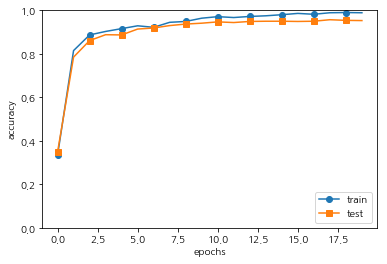

In [2]:
# MNIST 데이터셋 CNN 학습
from dataset.mnist import load_mnist
# from simple_convnet import SimpleConvNet
from common.trainer import Trainer
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 7.6 CNN 시각화하기